In [1]:
pip install sqlalchemy


Note: you may need to restart the kernel to use updated packages.


In [2]:
from pathlib import Path #Import modules 
from sqlalchemy import create_engine, text 

database_path = Path(r"C:\Users\anoje\.anaconda\Starter_Code\Resources\hawaii.sqlite") 


In [3]:
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

In [4]:
engine 

Engine(sqlite:///C:\Users\anoje\.anaconda\Starter_Code\Resources\hawaii.sqlite)

In [5]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import Column, Integer, String, Float, Date



Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
from sqlalchemy import Column, Integer, String, Float, Date
from sqlalchemy.ext.declarative import declarative_base

Base = declarative_base()

class Station(Base):
    __tablename__ = 'station'

    id = Column(Integer, primary_key=True)
    station = Column(String(255))
    name = Column(String(255))
    longitude = Column(Float)
    latitude = Column(Float)
    elevation = Column(Float)

class Measurement(Base):
    __tablename__ = 'measurement'

    id = Column(Integer, primary_key=True)
    station = Column(String(255))
    date = Column(Date)
    prcp = Column(Float)
    tobs = Column(Float)

Base.metadata.create_all(engine)


In [7]:
from sqlalchemy.orm import Session

session = Session(bind=engine)


In [8]:
Station = Base.metadata.tables['station']
Measurement = Base.metadata.tables['measurement']

In [9]:
try:
    pass

finally:
    session.close()
    

In [10]:

import datetime as d

recent = session.query(Measurement.c.date).order_by(Measurement.c.date.desc()).first()

print(f"RECENT DATE = {recent[0]}")

RECENT DATE = 2017-08-23


In [11]:
import pandas as pd 
from sqlalchemy import func 

recent_new = session.query(func.max(Measurement.c.date)).scalar()

recent_new_str = recent_new.strftime('%Y-%M-%D')

twelve_surf = (recent_new - d.timedelta(days=365)).strftime('%Y-%M-%D')

p = session.query(Measurement.c.date, Measurement.c.prcp).\
    filter(Measurement.c.date >= twelve_surf).\
    filter(Measurement.c.date <= recent_new_str).all()

for date, prcp in p:
    print(f"DATE={date}, PRECIPITATION VALUE == {prcp}")

dataframe = pd.DataFrame(p, columns=['Date', 'Precipitation'])
dataframe

DATE=2016-01-01, PRECIPITATION VALUE == 0.0
DATE=2016-01-02, PRECIPITATION VALUE == 0.0
DATE=2016-01-03, PRECIPITATION VALUE == 0.0
DATE=2016-01-04, PRECIPITATION VALUE == 0.0
DATE=2016-01-05, PRECIPITATION VALUE == 0.0
DATE=2016-01-06, PRECIPITATION VALUE == 0.0
DATE=2016-01-07, PRECIPITATION VALUE == 0.18
DATE=2016-01-08, PRECIPITATION VALUE == 0.01
DATE=2016-01-09, PRECIPITATION VALUE == 0.03
DATE=2016-01-10, PRECIPITATION VALUE == 0.01
DATE=2016-01-11, PRECIPITATION VALUE == 0.0
DATE=2016-01-12, PRECIPITATION VALUE == 0.0
DATE=2016-01-13, PRECIPITATION VALUE == 0.0
DATE=2016-01-14, PRECIPITATION VALUE == 0.0
DATE=2016-01-15, PRECIPITATION VALUE == 0.0
DATE=2016-01-16, PRECIPITATION VALUE == 0.01
DATE=2016-01-17, PRECIPITATION VALUE == 0.0
DATE=2016-01-18, PRECIPITATION VALUE == 0.0
DATE=2016-01-19, PRECIPITATION VALUE == 0.0
DATE=2016-01-20, PRECIPITATION VALUE == 0.0
DATE=2016-01-21, PRECIPITATION VALUE == 0.0
DATE=2016-01-22, PRECIPITATION VALUE == 0.0
DATE=2016-01-23, PRECIPITAT

,Date,Precipitation
0,2016-01-01,0.00
1,2016-01-02,0.00
2,2016-01-03,0.00
3,2016-01-04,0.00
4,2016-01-05,0.00
...,...,...
2304,2016-12-27,0.14
2305,2016-12-28,0.14
2306,2016-12-29,1.03
2307,2016-12-30,2.37


Text(0, 0.5, 'PRECIPITATION / INCHES')

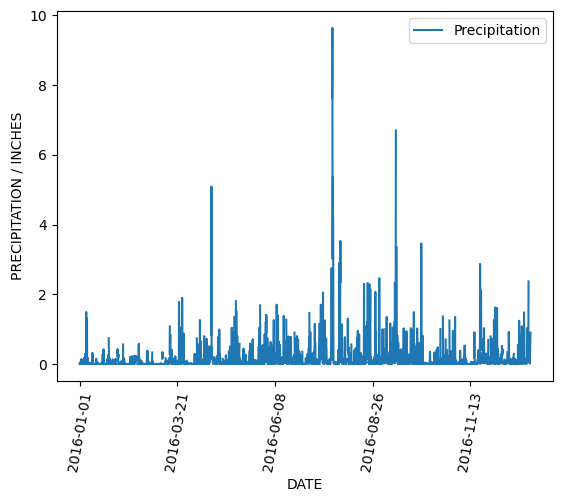

In [12]:

dataframe['Date'] = dataframe['Date'].astype(str)

dataframe_2 = dataframe.sort_values(by=['Date'])

plots = dataframe_2.plot(x='Date', y='Precipitation', rot=80)
plots.set_xlabel('DATE')
plots.set_ylabel('PRECIPITATION / INCHES')



In [13]:
end_result = dataframe_2['Precipitation'].describe() 
print(end_result) 

count    2069.000000
mean        0.179845
std         0.506363
min         0.000000
25%         0.000000
50%         0.020000
75%         0.150000
max         9.640000
Name: Precipitation, dtype: float64


In [14]:
session.query(Measurement.c.id).count()  

19550

In [15]:
m = session.query(Measurement.c.station, func.count(Measurement.c.station)).group_by(Measurement.c.station)\
.order_by(func.count(Measurement.c.station).desc()).all()

for station_id, observation_count in m:
    print(f"Station == {station_id}, Observation Count == {observation_count}")


Station == USC00519281, Observation Count == 2772
Station == USC00519397, Observation Count == 2724
Station == USC00513117, Observation Count == 2709
Station == USC00519523, Observation Count == 2669
Station == USC00516128, Observation Count == 2612
Station == USC00514830, Observation Count == 2202
Station == USC00511918, Observation Count == 1979
Station == USC00517948, Observation Count == 1372
Station == USC00518838, Observation Count == 511


In [16]:
session.query(func.min(Measurement.c.tobs), func.max(Measurement.c.tobs), func.avg(Measurement.c.tobs))\
.filter(Measurement.c.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

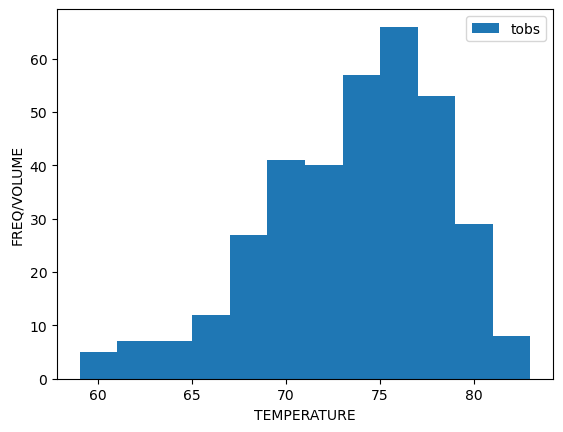

In [17]:
import matplotlib.pyplot as plt

session_tobs = session.query(Measurement.c.tobs).filter(Measurement.c.station == 'USC00519281')\
.filter(Measurement.c.date >= '2016-08-23').all()  #2016-08-23 is 1 year prior to recent date (2017-08-23)

tobs_dataframe = pd.DataFrame(session_tobs, columns=['tobs'])
tobs_dataframe.plot.hist(bins=12) #Bins 12 to represent 12 months 
plt.xlabel("TEMPERATURE")
plt.ylabel("FREQ/VOLUME")
plt.show()



In [18]:
session.close()